In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('smastercard.csv')

In [3]:
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1201534367345958912,1200421657451606016,1575303091000,2019-12-02,11:11:31,EST,488063350,mzmyrtlezplace,Adrien Beatty,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '488063350', 'username': 'mzmyrtl...",NaN,NaN,NaN,NaN
1,1201533846107246592,1201531665551638528,1575302966000,2019-12-02,11:09:26,EST,488063350,mzmyrtlezplace,Adrien Beatty,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '488063350', 'username': 'mzmyrtl...",NaN,NaN,NaN,NaN
2,1200454884136501255,1200421657451606016,1575045722000,2019-11-29,11:42:02,EST,852277338,juanrj83,JuanRJ,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '852277338', 'username': 'juanrj8...",NaN,NaN,NaN,NaN
3,1200425443993772033,1200421657451606016,1575038703000,2019-11-29,09:45:03,EST,206927878,wendykrafferty,Wendy,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '206927878', 'username': 'wendykr...",NaN,NaN,NaN,NaN
4,1200097729399013377,1200097729399013377,1574960570000,2019-11-28,12:02:50,EST,488063350,mzmyrtlezplace,Adrien Beatty,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '488063350', 'username': 'mzmyrtl...",NaN,NaN,NaN,NaN


In [5]:
reviews = df[['tweet']]

In [6]:
reviews.head()

,tweet
0,I would be happy to just be able to stream som...
1,👏👏👏👏👏 What a way to #startsomethingpriceless #...
2,This would be cool #blackfriday #pricelesssurp...
3,Been tapping! #BlackFriday2019 #PricelessSurpr...
4,When the bf wants Beats for Christmas. I think...


In [7]:
dict_p = []
f = open('positive-words.txt', 'r')   
for line in f:
    t = line.strip().lower()
    if t is not None and len(t) > 0:
        dict_p.append(t)
f.close()

In [8]:
dict_p

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [9]:
dict_n = []
f = open('negative-words.txt', 'r')
# f = open('negative-words.txt', 'r', encoding='ISO-8859-1') 
for line in f:
    t = line.strip().lower()
    if t is not None and len(t) > 0:
         dict_n.append(t)
f.close()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xef in position 3988: invalid continuation byte

In [10]:
dict_n

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [12]:
poscnt = []
negcnt = []
netcnt = []

for nrow in range(0,len(reviews)):
    
    text = df.tweet[nrow].lower()
    qa = 0
    qb = 0

    for word in dict_p :
        if (word in text) :
            qa = qa + 1

    for word in dict_n :
        if (word in text) :
            qb = qb + 1

    qc = qa - qb
    
    poscnt.append(qa)
    negcnt.append(qb)
    netcnt.append(qc)

In [14]:
df['poscnt'] = poscnt
df['negcnt'] = negcnt
df['netcnt'] = netcnt
df[['tweet','poscnt','negcnt','netcnt']]

,tweet,poscnt,negcnt,netcnt
0,I would be happy to just be able to stream som...,2,0,2
1,👏👏👏👏👏 What a way to #startsomethingpriceless #...,1,0,1
2,This would be cool #blackfriday #pricelesssurp...,2,0,2
3,Been tapping! #BlackFriday2019 #PricelessSurpr...,1,0,1
4,When the bf wants Beats for Christmas. I think...,2,0,2
5,@Mastercard Just saw this in my e-mail and cro...,4,1,3
6,Totally wish I could see her! After seeing her...,1,0,1
7,Just over one month left to participate in our...,2,0,2
8,"This Holiday Season, use your Mastercard when ...",3,2,1
9,Hi Shannon! We should soon. (Assuming you do f...,2,0,2


In [15]:
result = []
pos=0
neg=0
net=0
for num in netcnt:
    if (num > 0):
        result.append('pos')
        pos+=1
    elif (num < 0):
        result.append('neg')
        neg+=1
    else:
        result.append('net')
        net+=1
        
result

['pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'net',
 'neg',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'net',
 'pos',
 'net',
 'net',
 'neg',
 'pos',
 'net',
 'pos',


In [16]:
df['result'] = result

In [17]:
df[['tweet','poscnt','negcnt','netcnt','result']]

,tweet,poscnt,negcnt,netcnt,result
0,I would be happy to just be able to stream som...,2,0,2,pos
1,👏👏👏👏👏 What a way to #startsomethingpriceless #...,1,0,1,pos
2,This would be cool #blackfriday #pricelesssurp...,2,0,2,pos
3,Been tapping! #BlackFriday2019 #PricelessSurpr...,1,0,1,pos
4,When the bf wants Beats for Christmas. I think...,2,0,2,pos
5,@Mastercard Just saw this in my e-mail and cro...,4,1,3,pos
6,Totally wish I could see her! After seeing her...,1,0,1,pos
7,Just over one month left to participate in our...,2,0,2,pos
8,"This Holiday Season, use your Mastercard when ...",3,2,1,pos
9,Hi Shannon! We should soon. (Assuming you do f...,2,0,2,pos


In [19]:
import matplotlib.pyplot as plt

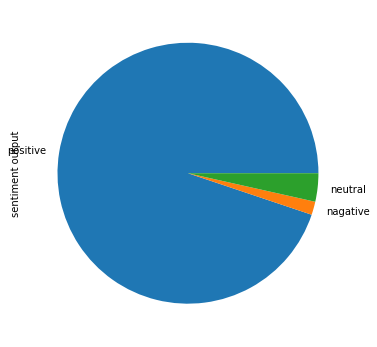

In [20]:
pie_label = ['positive', 'nagative', 'neutral']
series = pd.Series([pos,neg,net], 
                   index=pie_label, 
                   name='sentiment output')
series.plot.pie(figsize=(6, 6))

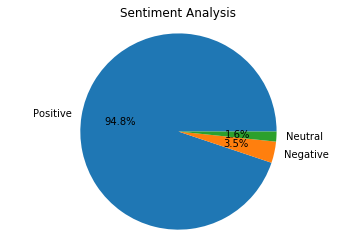

In [21]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = list(df.result.value_counts())
fig = plt.figure()  
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Sentiment Analysis')
plt.axis('equal')

plt.show()

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer #Vader 

sentiment=[]
sid = SentimentIntensityAnalyzer()
for sentence in df['tweet']:
    ss = sid.polarity_scores(sentence)
    sentiment.append(ss)
    for k in ss:
         print('{0}: {1},  '.format(k, ss[k]), end='')
    print()
    

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/Users/hejuntao96/nltk_data'
    - '/anaconda3/nltk_data'
    - '/anaconda3/share/nltk_data'
    - '/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [25]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hejuntao96/nltk_data...


True

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer #Vader 

sentiment=[]
sid = SentimentIntensityAnalyzer()
for sentence in df['tweet']:
    ss = sid.polarity_scores(sentence)
    sentiment.append(ss)
    for k in ss:
         print('{0}: {1},  '.format(k, ss[k]), end='')
    print()

neg: 0.0,  neu: 0.808,  pos: 0.192,  compound: 0.6467,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.685,  pos: 0.315,  compound: 0.3182,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.619,  pos: 0.381,  compound: 0.8402,  
neg: 0.091,  neu: 0.712,  pos: 0.197,  compound: 0.5081,  
neg: 0.0,  neu: 0.872,  pos: 0.128,  compound: 0.2942,  
neg: 0.0,  neu: 0.792,  pos: 0.208,  compound: 0.8118,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.856,  pos: 0.144,  compound: 0.4926,  
neg: 0.0,  neu: 0.51,  pos: 0.49,  compound: 0.8625,  
neg: 0.0,  neu: 0.738,  pos: 0.262,  compound: 0.7494,  
neg: 0.0,  neu: 0.788,  pos: 0.212,  compound: 0.7351,  
neg: 0.0,  neu: 0.706,  pos: 0.294,  compound: 0.9126,  
neg: 0.0,  neu: 0.846,  pos: 0.154,  compound: 0.4939,  
neg: 0.0,  neu: 0.782,  pos: 0.218,  compound: 0.4199,  
neg: 0.0,  neu: 0.763,  pos: 0.237,  compound: 0.4199,  
ne

neg: 0.0,  neu: 0.609,  pos: 0.391,  compound: 0.6988,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.067,  neu: 0.858,  pos: 0.075,  compound: 0.0828,  
neg: 0.0,  neu: 0.703,  pos: 0.297,  compound: 0.9413,  
neg: 0.0,  neu: 0.607,  pos: 0.393,  compound: 0.906,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.753,  pos: 0.247,  compound: 0.5562,  
neg: 0.0,  neu: 0.638,  pos: 0.362,  compound: 0.8176,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.682,  pos: 0.318,  compound: 0.6808,  
neg: 0.093,  neu: 0.727,  pos: 0.18,  compound: 0.3741,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.609,  pos: 0.391,  compound: 0.9515,  
neg: 0.062,  neu: 0.841,  pos: 0.097,  compound: 0.2003,  
neg: 0.043,  neu: 0.793,  pos: 0.164,  compound: 0.6114,  
neg: 0.0,  neu: 0

neg: 0.0,  neu: 0.909,  pos: 0.091,  compound: 0.2732,  
neg: 0.274,  neu: 0.726,  pos: 0.0,  compound: -0.5269,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.6,  pos: 0.4,  compound: 0.9285,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.697,  pos: 0.303,  compound: 0.8402,  
neg: 0.0,  neu: 0.667,  pos: 0.333,  compound: 0.8402,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.797,  pos: 0.203,  compound: 0.4215,  
neg: 0.254,  neu: 0.746,  pos: 0.0,  compound: -0.1779,  
neg: 0.076,  neu: 0.722,  pos: 0.202,  compound: 0.5684,  
neg: 0.0,  neu: 0.648,  pos: 0.352,  compound: 0.5859,  
neg: 0.0,  neu: 0.715,  pos: 0.285,  compound: 0.7482,  
neg: 0.0,  neu: 0.734,  pos: 0.266,  compound: 0.9243,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.781, 

neg: 0.0,  neu: 0.351,  pos: 0.649,  compound: 0.5719,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.814,  pos: 0.186,  compound: 0.8276,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.687,  pos: 0.313,  compound: 0.4926,  
neg: 0.0,  neu: 0.776,  pos: 0.224,  compound: 0.7477,  
neg: 0.0,  neu: 0.501,  pos: 0.499,  compound: 0.7893,  
neg: 0.0,  neu: 0.405,  pos: 0.595,  compound: 0.7074,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.697,  pos: 0.303,  compound: 0.5399,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.096,  neu: 0.596,  pos: 0.307,  compound: 0.6808,  
neg: 0.0,  neu: 0.604,  pos: 0.396,  compound: 0.8349,  
neg: 0.084,  neu: 0.837,  pos: 0.08,  compound: -0.0258,  
neg: 0.0,  neu: 0.313,  pos: 0.687,  compound: 0.9468,  
neg: 0.0,  neu: 1.0

neg: 0.098,  neu: 0.465,  pos: 0.437,  compound: 0.7623,  
neg: 0.0,  neu: 0.807,  pos: 0.193,  compound: 0.6696,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.12,  neu: 0.685,  pos: 0.195,  compound: 0.296,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.119,  neu: 0.881,  pos: 0.0,  compound: -0.2263,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.739,  pos: 0.261,  compound: 0.6476,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  n

neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.87,  pos: 0.13,  compound: 0.5106,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.379,  pos: 0.621,  compound: 0.508,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.585,  pos: 0.415,  compound: 0.7777,  
neg: 0.058,  neu: 0.719,  pos: 0.223,  compound: 0.8082,  
neg: 0.0,  neu: 0.878,  pos: 0.122,  compound: 0.3593,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.408,  pos: 0.592,  compound: 0.8271,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.113,  neu: 0.887,  pos: 0.0,  compound: -0.1027,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.659,  pos: 0.341,  compound: 0.8047,  
neg: 0.0,  neu: 0.787,  pos: 0.213,  compound: 0.8126,  
neg: 0.0,  neu: 0.742,  pos: 0.258,  

neg: 0.0,  neu: 0.8,  pos: 0.2,  compound: 0.3612,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.355,  pos: 0.645,  compound: 0.877,  
neg: 0.0,  neu: 0.741,  pos: 0.259,  compound: 0.6369,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.508,  pos: 0.492,  compound: 0.4404,  
neg: 0.0,  neu: 0.323,  pos: 0.677,  compound: 0.6369,  
neg: 0.0,  neu: 0.519,  pos: 0.481,  compound: 0.7579,  
neg: 0.0,  neu: 0.445,  pos: 0.555,  compound: 0.8168,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.066,  neu: 0.664,  pos: 0.27,  compound: 0.7351,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0, 

neg: 0.028,  neu: 0.651,  pos: 0.321,  compound: 0.9167,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.769,  pos: 0.231,  compound: 0.5994,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.756,  pos: 0.244,  compound: 0.8429,  
neg: 0.0,  neu: 0.641,  pos: 0.359,  compound: 0.8065,  
neg: 0.0,  neu: 0.682,  pos: 0.318,  compound: 0.4939,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.424,  pos: 0.576,  compound: 0.6221,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.488,  pos: 0.512,  compound: 0.6369,  
neg: 0.0,  neu: 0.807,  pos: 0.193,  compound: 0.4767,  
neg: 0.126,  neu: 0.63,  pos: 0.244,  compound: 0.3612,  
neg: 0.0,  neu: 0.822,  pos: 0.178,  compound: 0.3802,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.61,  pos: 0.39,  compound: 0.4926,  
neg: 0.0,  neu: 0.588,

neg: 0.281,  neu: 0.51,  pos: 0.208,  compound: -0.3481,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.565,  pos: 0.435,  compound: 0.4738,  
neg: 0.0,  neu: 0.201,  pos: 0.799,  compound: 0.6103,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.075,  neu: 0.757,  pos: 0.168,  compound: 0.4512,  
neg: 0.0,  neu: 0.383,  pos: 0.617,  compound: 0.8653,  
neg: 0.0,  neu: 0.417,  pos: 0.583,  compound: 0.6369,  
neg: 0.0,  neu: 0.518,  pos: 0.482,  compound: 0.4199,  
neg: 0.0,  neu: 0.75,  pos: 0.25,  compound: 0.5673,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.582,  pos: 0.418,  compound: 0.8016,  
neg: 0.0,  neu: 0.701,  pos: 0.299,  compound: 0.4574,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.455,  pos: 0.545,  compound: 0.802,  
neg: 0.0,  neu: 0.565,  pos: 0.435,  compound: 0.7717,  
neg: 0.0,  neu:

neg: 0.0,  neu: 0.568,  pos: 0.432,  compound: 0.9493,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.558,  pos: 0.442,  compound: 0.9133,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.448,  pos: 0.552,  compound: 0.5707,  
neg: 0.0,  neu: 0.817,  pos: 0.183,  compound: 0.5707,  
neg: 0.0,  neu: 0.458,  pos: 0.542,  compound: 0.7959,  
neg: 0.0,  neu: 0.785,  pos: 0.215,  compound: 0.5095,  
neg: 0.0,  neu: 0.817,  pos: 0.183,  compound: 0.5707,  
neg: 0.0,  neu: 0.817,  pos: 0.183,  compound: 0.5707,  
neg: 0.075,  neu: 0.755,  pos: 0.17,  compound: 0.4588,  
neg: 0.083,  neu: 0.715,  pos: 0.202,  compound: 0.4576,  
neg: 0.0,  neu: 0.719,  pos: 0.281,  compound: 0.8225,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.185,  neu: 0.815,  pos: 0.0,  compound: -0.5927,  
neg: 0.0,  neu: 0.817,  pos: 0.183,  compound: 0.5707,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 

neg: 0.0,  neu: 0.65,  pos: 0.35,  compound: 0.7906,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.635,  pos: 0.365,  compound: 0.7841,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.436,  pos: 0.564,  compound: 0.9796,  
neg: 0.0,  neu: 0.742,  pos: 0.258,  compound: 0.5399,  
neg: 0.0,  neu: 0.549,  pos: 0.451,  compound: 0.9212,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.437,  pos: 0.563,  compound: 0.5954,  
neg: 0.0,  neu: 0.852,  pos: 0.148,  compound: 0.4184,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.73,  pos: 0.27,  compound: 0.3804,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.721,  pos: 0.279,  compound: 0

neg: 0.0,  neu: 0.579,  pos: 0.421,  compound: 0.7799,  
neg: 0.0,  neu: 0.817,  pos: 0.183,  compound: 0.5707,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.299,  pos: 0.701,  compound: 0.6892,  
neg: 0.0,  neu: 0.721,  pos: 0.279,  compound: 0.3237,  
neg: 0.0,  neu: 0.556,  pos: 0.444,  compound: 0.6988,  
neg: 0.0,  neu: 0.715,  pos: 0.285,  compound: 0.75,  
neg: 0.0,  neu: 0.448,  pos: 0.552,  compound: 0.5707,  
neg: 0.0,  neu: 0.817,  pos: 0.183,  compound: 0.5707,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.144,  pos: 0.856,  compound: 0.9167,  
neg: 0.0,  neu: 0.458,  pos: 0.542,  compound: 0.7964,  
neg: 0.0,  neu: 0.817,  pos: 0.183,  compound: 0.5707,  
neg: 0.0,  neu: 0.442,  pos: 0.558,  compound: 0.8774,  
neg: 0.0,  neu: 0.472,  pos: 0.528,  compound: 0.8774,  
neg: 0.0,  neu: 0.596,  pos: 0.404,  compound: 0.7269,  
neg: 0.0,  neu: 0.816,  pos: 0.184,  compound: 0.4019,

neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.337,  pos: 0.663,  compound: 0.7096,  
neg: 0.0,  neu: 0.513,  pos: 0.487,  compound: 0.5859,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.629,  pos: 0.371,  compound: 0.7579,  
neg: 0.0,  neu: 0.556,  pos: 0.444,  compound: 0.5848,  
neg: 0.0,  neu: 0.603,  pos: 0.397,  compound: 0.6809,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.139,  neu: 0.506,  pos: 0.355,  compound: 0.8648,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.506,  pos: 0.494,  compound: 0.8313,  
neg: 0.151,  neu: 0.849,  pos: 0.0,  compound: -0.6901,  
neg: 0.143,  neu: 0.857,  pos: 0.0,  compound: -0.4601,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.727,  pos: 0.273,  compound: 0.75,  
neg: 0.0,  neu: 0.764,  pos:

neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.52,  pos: 0.48,  compound: 0.5707,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.444,  pos: 0.556,  compound: 0.3612,  
neg: 0.0,  neu: 0.766,  pos: 0.234,  compound: 0.5673,  
neg: 0.0,  neu: 0.503,  pos: 0.497,  compound: 0.7127,  
neg: 0.0,  neu: 0.698,  pos: 0.302,  compound: 0.3802,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.541,  pos: 0.459,  compound: 0.917,  
neg: 0.0,  neu: 0.763,  pos: 0.237,  compound: 0.6476,  
neg: 0.0,  neu: 0.444,  pos: 0.556,  compound: 0.3612,  
neg: 0.0,  neu: 0.66,  pos: 0.34,  compound: 0.7717,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.543,  pos: 0.457,  compound: 0.6369,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.751,  pos: 0.249,  compound: 0.4559,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.737,  pos: 0.263,  compound: 0.6458,  
neg: 0.0,  neu: 0.594

neg: 0.0,  neu: 0.631,  pos: 0.369,  compound: 0.923,  
neg: 0.0,  neu: 0.52,  pos: 0.48,  compound: 0.5707,  
neg: 0.0,  neu: 0.641,  pos: 0.359,  compound: 0.4215,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.793,  pos: 0.207,  compound: 0.7946,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.364,  pos: 0.636,  compound: 0.7906,  
neg: 0.0,  neu: 0.484,  pos: 0.516,  compound: 0.7494,  
neg: 0.0,  neu: 0.409,  pos: 0.591,  compound: 0.8647,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.513,  pos: 0.487,  compound: 0.5859,  
neg: 0.0,  neu: 0.469,  pos: 0.531,  compound: 0.5267,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.403,  pos: 0.597,  compound: 0.8122,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.316,  pos: 0.68

neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.548,  pos: 0.452,  compound: 0.5106,  
neg: 0.0,  neu: 0.639,  pos: 0.361,  compound: 0.8622,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.711,  pos: 0.289,  compound: 0.5013,  
neg: 0.0,  neu: 0.741,  pos: 0.259,  compound: 0.2732,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.683,  pos: 0.317,  compound: 0.5023,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.631,  pos: 0.369,  compound: 0.6239,  
neg: 0.0,  neu: 0.533,  pos: 0.467,  compound: 0.658,  
ne

neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.533,  pos: 0.467,  compound: 0.7906,  
neg: 0.0,  neu: 0.646,  pos: 0.354,  compound: 0.6588,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.492,  pos: 0.508,  compound: 0.4767,  
neg: 0.0,  neu: 0.668,  pos: 0.332,  compound: 0.7156,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.426,  pos: 0.574,  compound: 0.6597,  
neg: 0.0,  neu: 0.64,  pos: 0.36,  compound: 0.6696,  
neg: 0.0,  neu: 0.244,  pos: 0.756,  compound: 0.4753,  
neg: 0.0,  neu: 0.363,  pos: 0.637,  compound: 0.95,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.681,  pos: 0.319,  compound: 0.7959,  
neg: 0.0,  neu: 0.439,  pos: 0.561,  compound: 0.7284,  
neg: 0.0,  neu: 0.218,  pos: 0.782

neg: 0.0,  neu: 0.527,  pos: 0.473,  compound: 0.7412,  
neg: 0.0,  neu: 0.435,  pos: 0.565,  compound: 0.5994,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.803,  pos: 0.197,  compound: 0.4019,  
neg: 0.0,  neu: 0.359,  pos: 0.641,  compound: 0.5538,  
neg: 0.0,  neu: 0.753,  pos: 0.247,  compound: 0.3164,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.648,  pos: 0.352,  compound: 0.5859,  
neg: 0.0,  neu: 0.781,  pos: 0.219,  compound: 0.5411,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.69,  pos: 0.31,  compound: 0.6688,  
neg: 0.0,  neu: 0.634,  pos: 0.366,  compound: 0.6968,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.441,  pos: 0.559,  compound: 0.5859,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.606,  pos: 0.394,  compound: 0.7579,  
neg: 0.0,  neu: 0.376,  pos: 0.624,  compound: 0.7163,  
neg: 0.0,  neu: 0.

neg: 0.0,  neu: 0.477,  pos: 0.523,  compound: 0.658,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.533,  pos: 0.467,  compound: 0.658,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.148,  neu: 0.852,  pos: 0.0,  compound: -0.3818,  
neg: 0.0,  neu: 0.839,  pos: 0.161,  compound: 0.3612,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.589,  pos: 0.411,  compound: 0.7891,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 

neg: 0.0,  neu: 0.854,  pos: 0.146,  compound: 0.5826,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.802,  pos: 0.198,  compound: 0.6369,  
neg: 0.0,  neu: 0.833,  pos: 0.167,  compound: 0.8327,  
neg: 0.0,  neu: 0.721,  pos: 0.279,  compound: 0.4767,  
neg: 0.0,  neu: 0.801,  pos: 0.199,  compound: 0.1867,  
neg: 0.0,  neu: 0.6,  pos: 0.4,  compound: 0.6114,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.809,  pos: 0.191,  compound: 0.3802,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.466,  pos: 0.534,  compound: 0.9093,  
neg: 0.0,  neu: 0.504,  pos: 0.496,  compound: 0.9841,  
neg: 0.0,  neu: 0.77,  pos: 0.23,  compound: 0.4926,  
neg: 0.0,  neu: 0.892,  pos: 0.108,  compound: 0.4404,  
neg: 0.0,  neu: 0.678,  pos: 0.322,  compound: 0.5859,  
neg: 0.0,  neu: 1.0,  

neg: 0.0,  neu: 0.486,  pos: 0.514,  compound: 0.6476,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.732,  pos: 0.268,  compound: 0.9092,  
neg: 0.196,  neu: 0.804,  pos: 0.0,  compound: -0.296,  
neg: 0.0,  neu: 0.685,  pos: 0.315,  compound: 0.5684,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.496,  pos: 0.504,  compound: 0.7249,  
neg: 0.0,  neu: 0.448,  pos: 0.552,  compound: 0.5719,  
neg: 0.0,  neu: 0.588,  pos: 0.412,  compound: 0.6369,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.413,  pos: 0.587,  compound: 0.69,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.096,  neu: 0.776,  pos: 0.128,  compound: 0.1754,  
neg: 0.0,  neu: 0.651,  pos: 0.349,  compound: 0.9235,  
neg: 0.0,  neu: 0.687,  pos: 0

neg: 0.0,  neu: 0.488,  pos: 0.512,  compound: 0.6369,  
neg: 0.0,  neu: 0.831,  pos: 0.169,  compound: 0.6209,  
neg: 0.0,  neu: 0.667,  pos: 0.333,  compound: 0.4588,  
neg: 0.27,  neu: 0.73,  pos: 0.0,  compound: -0.5859,  
neg: 0.0,  neu: 0.517,  pos: 0.483,  compound: 0.8555,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.844,  pos: 0.156,  compound: 0.6124,  
neg: 0.0,  neu: 0.81,  pos: 0.19,  compound: 0.7263,  
neg: 0.0,  neu: 0.339,  pos: 0.661,  compound: 0.5994,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.597,  neu: 0.403,  pos: 0.0,  compound: -0.6652,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.653,  pos: 0.347,  compound: 0.9421,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.556,  pos: 0.444,  compound: 0.4926,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.53,  pos: 0.47,  compound: 0.7351,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,

neg: 0.0,  neu: 0.542,  pos: 0.458,  compound: 0.9285,  
neg: 0.0,  neu: 0.662,  pos: 0.338,  compound: 0.9141,  
neg: 0.0,  neu: 0.789,  pos: 0.211,  compound: 0.91,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.062,  neu: 0.648,  pos: 0.29,  compound: 0.8442,  
neg: 0.0,  neu: 0.792,  pos: 0.208,  compound: 0.6369,  
neg: 0.038,  neu: 0.618,  pos: 0.344,  compound: 0.9169,  
neg: 0.099,  neu: 0.584,  pos: 0.317,  compound: 0.8932,  
neg: 0.115,  neu: 0.625,  pos: 0.26,  compound: 0.5847,  
neg: 0.072,  neu: 0.553,  pos: 0.376,  compound: 0.9765,  
neg: 0.231,  neu: 0.564,  pos: 0.205,  compound: -0.1901,  
neg: 0.0,  neu: 0.63,  pos: 0.37,  compound: 0.9337,  
neg: 0.0,  neu: 0.642,  pos: 0.358,  compound: 0.9666,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.323,  pos: 0.677,  compound: 0.6369,  
neg: 0.046,  neu: 0.713,  pos: 0.242,  compound: 0.8353,  
neg: 0.0,  neu: 0.323,  pos: 0.677,  compou

neg: 0.0,  neu: 0.613,  pos: 0.387,  compound: 0.9674,  
neg: 0.027,  neu: 0.509,  pos: 0.464,  compound: 0.9788,  
neg: 0.099,  neu: 0.503,  pos: 0.398,  compound: 0.9358,  
neg: 0.0,  neu: 0.659,  pos: 0.341,  compound: 0.9623,  
neg: 0.0,  neu: 0.681,  pos: 0.319,  compound: 0.938,  
neg: 0.041,  neu: 0.702,  pos: 0.258,  compound: 0.9148,  
neg: 0.047,  neu: 0.59,  pos: 0.363,  compound: 0.9678,  
neg: 0.0,  neu: 0.785,  pos: 0.215,  compound: 0.91,  
neg: 0.0,  neu: 0.695,  pos: 0.305,  compound: 0.9517,  
neg: 0.0,  neu: 0.677,  pos: 0.323,  compound: 0.7712,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.518,  pos: 0.482,  compound: 0.9726,  
neg: 0.0,  neu: 0.71,  pos: 0.29,  compound: 0.9511,  
neg: 0.0,  neu: 0.444,  pos: 0.556,  compound: 0.3612,  
neg: 0.0,  neu: 0.633,  pos: 0.367,  compound: 0.9623,  
neg: 0.079,  neu: 0.692,  pos: 0.228,  compound: 0.8331,  
neg: 0.0,  neu: 0.651,  pos: 0.349,  compound: 0.9719,  
neg: 0.0,  neu: 0.832,  pos: 0.168

neg: 0.0,  neu: 0.773,  pos: 0.227,  compound: 0.7177,  
neg: 0.0,  neu: 0.647,  pos: 0.353,  compound: 0.9338,  
neg: 0.0,  neu: 0.802,  pos: 0.198,  compound: 0.5707,  
neg: 0.0,  neu: 0.804,  pos: 0.196,  compound: 0.658,  
neg: 0.0,  neu: 0.806,  pos: 0.194,  compound: 0.7901,  
neg: 0.0,  neu: 0.647,  pos: 0.353,  compound: 0.7269,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.769,  pos: 0.231,  compound: 0.8268,  
neg: 0.0,  neu: 0.769,  pos: 0.231,  compound: 0.8268,  
neg: 0.0,  neu: 0.663,  pos: 0.337,  compound: 0.6792,  
neg: 0.0,  neu: 0.792,  pos: 0.208,  compound: 0.6369,  
neg: 0.0,  neu: 0.738,  pos: 0.262,  compound: 0.8356,  
neg: 0.0,  neu: 0.8,  pos: 0.2,  compound: 0.7901,  
neg: 0.0,  neu: 0.8,  pos: 0.2,  compound: 0.7901,  
neg: 0.0,  neu: 0.806,  pos: 0.194,  compound: 0.7901,  
neg: 0.0,  neu: 0.836,  pos: 0.164,  compound: 0.6239,  
neg: 0.0,  neu: 0.812,  pos: 0.188,  compound: 0.8316,  
neg: 0.108,  neu: 0.641,  pos: 0.251,  compound

neg: 0.072,  neu: 0.743,  pos: 0.185,  compound: 0.6476,  
neg: 0.0,  neu: 0.867,  pos: 0.133,  compound: 0.3164,  
neg: 0.074,  neu: 0.669,  pos: 0.257,  compound: 0.7569,  
neg: 0.0,  neu: 0.875,  pos: 0.125,  compound: 0.3164,  
neg: 0.0,  neu: 0.866,  pos: 0.134,  compound: 0.4767,  
neg: 0.0,  neu: 0.707,  pos: 0.293,  compound: 0.8908,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.067,  neu: 0.77,  pos: 0.164,  compound: 0.4389,  
neg: 0.0,  neu: 0.939,  pos: 0.061,  compound: 0.3987,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.109,  neu: 0.778,  pos: 0.113,  compound: 0.0516,  
neg: 0.0,  neu: 0.795,  pos: 0.205,  compound: 0.7901,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.704,  pos: 0.296,  compound: 0.7088,  
neg: 0.306,  neu

neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.569,  pos: 0.431,  compound: 0.8439,  
neg: 0.0,  neu: 0.526,  pos: 0.474,  compound: 0.8934,  
neg: 0.0,  neu: 0.739,  pos: 0.261,  compound: 0.8718,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.728,  pos: 0.272,  compound: 0.6249,  
neg: 0.0,  neu: 0.739,  pos: 0.261,  compound: 0.8718,  
neg: 0.0,  neu: 0.751,  pos: 0.249,  compound: 0.9319,  
neg: 0.0,  neu: 0.739,  pos: 0.261,  compound: 0.8718,  
neg: 0.0,  neu: 0.674,  pos: 0.326,  compound: 0.743,  
neg: 0.0,  neu: 0.769,  pos: 0.231,  compound: 0.8172,  
neg: 0.146,  neu: 0.752,  pos: 0.102,  compound: -0.2924,  
neg: 0.0,  neu: 0.708,  pos: 0.292,  compound: 0.8718,  
neg: 0.0,  neu: 0.739,  pos: 0.261,  compound: 0.8718,  
neg: 0.0,  neu: 0.739,  pos: 0.261,  compound: 0.8718,  
neg: 0.0,  neu: 0.752,  pos: 0.248,  compound: 0.8718,  
neg: 0.0,  neu: 0.739,  pos: 0.261,  compound: 0.8

neg: 0.0,  neu: 0.531,  pos: 0.469,  compound: 0.8883,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.896,  pos: 0.104,  compound: 0.296,  
neg: 0.0,  neu: 0.788,  pos: 0.212,  compound: 0.6588,  
neg: 0.0,  neu: 0.465,  pos: 0.535,  compound: 0.8881,  
neg: 0.0,  neu: 0.465,  pos: 0.535,  compound: 0.8881,  
neg: 0.0,  neu: 0.465,  pos: 0.535,  compound: 0.8881,  
neg: 0.0,  neu: 0.465,  pos: 0.535,  compound: 0.8881,  
neg: 0.0,  neu: 0.376,  pos: 0.624,  compound: 0.807,  
neg: 0.0,  neu: 0.376,  pos: 0.624,  compound: 0.807,  
neg: 0.0,  neu: 0.632,  pos: 0.368,  compound: 0.75,  
neg: 0.0,  neu: 0.613,  pos: 0.387,  compound: 0.743,  
neg: 0.0,  neu: 0.781,  pos: 0.219,  compound: 0.6369,  
neg: 0.0,  neu: 0.543,  pos: 0.457,  compound: 0.8439,  
neg: 0.0,  neu: 0.492,  pos: 0.508,  compound: 0.8519,  
neg: 0.0,  neu: 0.863,  pos: 0.137,  compound: 0.4019,  
neg: 0.0,  neu: 0.813,  pos: 0.187,  compound: 0.4574,  
neg: 0.08,  neu: 0.58,  pos: 0.34,  compound

neg: 0.0,  neu: 0.752,  pos: 0.248,  compound: 0.5093,  
neg: 0.0,  neu: 0.879,  pos: 0.121,  compound: 0.4374,  
neg: 0.0,  neu: 0.869,  pos: 0.131,  compound: 0.4898,  
neg: 0.0,  neu: 0.879,  pos: 0.121,  compound: 0.4374,  
neg: 0.0,  neu: 0.869,  pos: 0.131,  compound: 0.4898,  
neg: 0.0,  neu: 0.869,  pos: 0.131,  compound: 0.4898,  
neg: 0.0,  neu: 0.869,  pos: 0.131,  compound: 0.4898,  
neg: 0.0,  neu: 0.879,  pos: 0.121,  compound: 0.4374,  
neg: 0.0,  neu: 0.879,  pos: 0.121,  compound: 0.4374,  
neg: 0.0,  neu: 0.869,  pos: 0.131,  compound: 0.4898,  
neg: 0.0,  neu: 0.869,  pos: 0.131,  compound: 0.4898,  
neg: 0.0,  neu: 0.869,  pos: 0.131,  compound: 0.4898,  
neg: 0.0,  neu: 0.869,  pos: 0.131,  compound: 0.4898,  
neg: 0.0,  neu: 0.383,  pos: 0.617,  compound: 0.9057,  
neg: 0.0,  neu: 0.822,  pos: 0.178,  compound: 0.3802,  
neg: 0.0,  neu: 0.806,  pos: 0.194,  compound: 0.4374,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compo

neg: 0.099,  neu: 0.901,  pos: 0.0,  compound: -0.296,  
neg: 0.0,  neu: 0.73,  pos: 0.27,  compound: 0.3802,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.633,  pos: 0.367,  compound: 0.5399,  
neg: 0.0,  neu: 0.802,  pos: 0.198,  compound: 0.6369,  
neg: 0.0,  neu: 0.862,  pos: 0.138,  compound: 0.4374,  
neg: 0.0,  neu: 0.862,  pos: 0.138,  compound: 0.4374,  
neg: 0.0,  neu: 0.862,  pos: 0.138,  compound: 0.4374,  
neg: 0.0,  neu: 0.862,  pos: 0.138,  compound: 0.4374,  
neg: 0.0,  neu: 0.862,  pos: 0.138,  compound: 0.4374,  
neg: 0.0,  neu: 0.596,  pos: 0.404,  compound: 0.7269,  
neg: 0.0,  neu: 0.546,  pos: 0.454,  compound: 0.9345,  
neg: 0.0,  neu: 0.569,  pos: 0.431,  compound: 0.6476,  
neg: 0.0,  neu: 0.564,  pos: 0.436,  compound: 0.9401,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.538,  pos: 0.462,  compound: 0.9186,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg:

neg: 0.0,  neu: 0.868,  pos: 0.132,  compound: 0.4374,  
neg: 0.121,  neu: 0.594,  pos: 0.286,  compound: 0.4975,  
neg: 0.0,  neu: 0.439,  pos: 0.561,  compound: 0.7506,  
neg: 0.0,  neu: 0.313,  pos: 0.687,  compound: 0.7644,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.774,  pos: 0.226,  compound: 0.4215,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.868,  pos: 0.132,  compound: 0.4374,  
neg: 0.0,  neu: 0.868,  pos: 0.132,  compound: 0.4374,  
neg: 0.0,  neu: 0.868,  pos: 0.132,  compound: 0.4374,  
neg: 0.0,  neu: 0.767,  pos: 0.233,  compound: 0.6988,  
neg: 0.0,  neu: 0.868,  pos: 0.132,  compound: 0.4374,  
neg: 0.0,  neu: 0.868,  pos: 0.132,  compound: 0.4374,  
neg: 0.0,  neu: 0.868,  pos: 0.132,  compound: 0.4374,  
neg: 0.0,  neu: 0.868,  pos: 0.132,  compound: 0.4374,  
neg: 0.0,  neu: 0.868,  pos: 0.132,  compound: 0.4374,  


neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.698,  pos: 0.302,  compound: 0.7579,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.762,  pos: 0.238,  compound: 0.3612,  
neg: 0.0,  neu: 0.846,  pos: 0.154,  compound: 0.4738,  
neg: 0.0,  neu: 0.615,  pos: 0.385,  compound: 0.875,  
neg: 0.0,  neu: 0.61,  pos: 0.39,  compound: 0.4926,  
neg: 0.0,  neu: 0.867,  pos: 0.133,  compound: 0.3182,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.089,  neu: 0.767,  pos: 0.144,  compound: 0.3348,  
neg: 0.0,  neu: 0.694,  pos: 0.306,  compound: 0.8176,  
neg: 0.0,  neu: 0.62,  pos: 0.38,  compound: 0.886,  
neg: 0.0,  neu: 0.572,  pos: 0.428,  compound: 0.8879,  
neg: 0.0,  neu: 0.734,  pos: 0.266,  compound: 0.6988,  
neg: 0.0,  neu: 0.659,  pos: 0.341,  compound: 0.807,  
neg: 0.0,  neu: 0.601,  pos: 0.399,  compound: 0.8516,  
neg: 0.058,  neu: 0.804,  pos: 0.138,  compound: 0.4199,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 

neg: 0.0,  neu: 0.71,  pos: 0.29,  compound: 0.6239,  
neg: 0.0,  neu: 0.71,  pos: 0.29,  compound: 0.6239,  
neg: 0.0,  neu: 0.635,  pos: 0.365,  compound: 0.7845,  
neg: 0.31,  neu: 0.69,  pos: 0.0,  compound: -0.5574,  
neg: 0.0,  neu: 0.807,  pos: 0.193,  compound: 0.4767,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.658,  pos: 0.342,  compound: 0.7402,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.71,  pos: 0.29,  compound: 0.6239,  
neg: 0.0,  neu: 0.635,  pos: 0.365,  compound: 0.7845,  
neg: 0.0,  neu: 0.609,  pos: 0.391,  compound: 0.8402,  
neg: 0.0,  neu: 0.805,  pos: 0.195,  compound: 0.4404,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 1.0,  pos: 0.0,  compound: 0.0,  
neg: 0.0,  neu: 0.678,  pos: 0.322,  

In [27]:
df_s = pd.DataFrame(sentiment)

In [28]:
df['pos_score'] = df_s['pos']
df['neu_score'] = df_s['neu']
df['neg_socre'] = df_s['neg']
df['comp_score'] = df_s['compound']

In [29]:
df[['tweet','pos_score','neu_score','neg_socre','comp_score']]

,tweet,pos_score,neu_score,neg_socre,comp_score
0,I would be happy to just be able to stream som...,0.192,0.808,0.000,0.6467
1,👏👏👏👏👏 What a way to #startsomethingpriceless #...,0.000,1.000,0.000,0.0000
2,This would be cool #blackfriday #pricelesssurp...,0.315,0.685,0.000,0.3182
3,Been tapping! #BlackFriday2019 #PricelessSurpr...,0.000,1.000,0.000,0.0000
4,When the bf wants Beats for Christmas. I think...,0.000,1.000,0.000,0.0000
5,@Mastercard Just saw this in my e-mail and cro...,0.381,0.619,0.000,0.8402
6,Totally wish I could see her! After seeing her...,0.197,0.712,0.091,0.5081
7,Just over one month left to participate in our...,0.128,0.872,0.000,0.2942
8,"This Holiday Season, use your Mastercard when ...",0.208,0.792,0.000,0.8118
9,Hi Shannon! We should soon. (Assuming you do f...,0.000,1.000,0.000,0.0000


In [30]:
result_NLTK = []
pos=0
neg=0
net=0
for num in df_s['compound']:
    if (num > 0):
        result_NLTK.append('pos')
        pos+=1
    elif (num < 0):
        result_NLTK.append('neg')
        neg+=1
    else:
        result_NLTK.append('net')
        net+=1
        
result_NLTK

['pos',
 'net',
 'pos',
 'net',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'net',
 'pos',
 'pos',
 'pos',
 'net',
 'pos',
 'pos',
 'neg',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'net',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'net',
 'pos',
 'net',
 'net',
 'net',
 'pos',
 'pos',
 'net',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'net',


In [31]:
df['result_NLTK'] = result_NLTK

In [32]:
df[['tweet','pos_score','neu_score','neg_socre','comp_score','result_NLTK']]

,tweet,pos_score,neu_score,neg_socre,comp_score,result_NLTK
0,I would be happy to just be able to stream som...,0.192,0.808,0.000,0.6467,pos
1,👏👏👏👏👏 What a way to #startsomethingpriceless #...,0.000,1.000,0.000,0.0000,net
2,This would be cool #blackfriday #pricelesssurp...,0.315,0.685,0.000,0.3182,pos
3,Been tapping! #BlackFriday2019 #PricelessSurpr...,0.000,1.000,0.000,0.0000,net
4,When the bf wants Beats for Christmas. I think...,0.000,1.000,0.000,0.0000,net
5,@Mastercard Just saw this in my e-mail and cro...,0.381,0.619,0.000,0.8402,pos
6,Totally wish I could see her! After seeing her...,0.197,0.712,0.091,0.5081,pos
7,Just over one month left to participate in our...,0.128,0.872,0.000,0.2942,pos
8,"This Holiday Season, use your Mastercard when ...",0.208,0.792,0.000,0.8118,pos
9,Hi Shannon! We should soon. (Assuming you do f...,0.000,1.000,0.000,0.0000,net


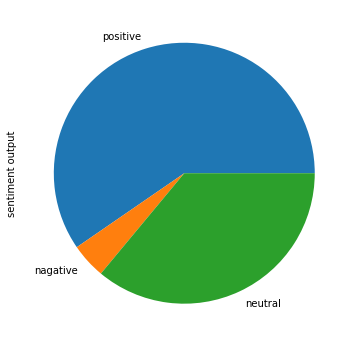

In [33]:
pie_label = ['positive', 'nagative', 'neutral']
series = pd.Series([pos,neg,net], 
                   index=pie_label, 
                   name='sentiment output')
series.plot.pie(figsize=(6, 6))

In [43]:
result_NLTK_2 = []
pos=0
neg=0
net=0
st_pos=0
st_neg=0
for num in df_s['compound']:
    if (num > 0.5):
        result_NLTK_2.append('strong_pos')
        st_pos+=1
    elif (num >0 ):
        result_NLTK_2.append('pos')
        pos+=1    
    elif (num < -0.5):
        result_NLTK_2.append('strong_neg')
        st_neg+=1
    elif (num < 0):
        result_NLTK_2.append('neg')
        neg+=1
    else:
        result_NLTK_2.append('net')
        net+=1
        
result_NLTK_2

['strong_pos',
 'net',
 'pos',
 'net',
 'net',
 'strong_pos',
 'strong_pos',
 'pos',
 'strong_pos',
 'net',
 'pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'pos',
 'pos',
 'pos',
 'net',
 'strong_pos',
 'strong_pos',
 'pos',
 'strong_pos',
 'strong_pos',
 'neg',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'pos',
 'strong_pos',
 'net',
 'pos',
 'strong_pos',
 'pos',
 'strong_pos',
 'net',
 'pos',
 'pos',
 'pos',
 'pos',
 'strong_pos',
 'strong_pos',
 'strong_neg',
 'pos',
 'pos',
 'pos',
 'net',
 'strong_pos',
 'pos',
 'strong_pos',
 'net',
 'pos',
 'pos',
 'neg',
 'net',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_neg',
 'strong_pos',
 'pos',
 'strong_pos',
 'net',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'net',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',
 'strong_pos',


In [56]:
df['result_NLTK_2'] = result_NLTK_2

In [57]:
df.result_NLTK_2.value_counts()

strong_pos    3702
net           3007
pos           1271
neg            236
strong_neg     129
Name: result_NLTK_2, dtype: int64

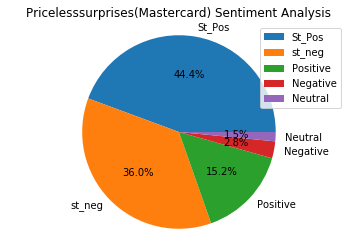

In [59]:
labels = 'St_Pos','st_neg','Positive','Negative', 'Neutral'
sizes = list(df.result_NLTK_2.value_counts())
#fig = plt.figure()  
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pricelesssurprises(Mastercard) Sentiment Analysis')
plt.axis('equal')
plt.legend()
plt.show()